<a href="https://colab.research.google.com/github/AnitaKirkovska/Machine_Learning_Class/blob/master/HW2/My_Solutions/CIFAR10_Architecture_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Second CNN with Dropout**



1.   Conv2D + Relu + Conv2D + Relu + Maxpool
2.   Conv2D + Relu + Conv2D + Relu + Maxpool
3.   Dense
4.   Dropout(0.5)



**Loading the CIFAR10 set**

In [0]:
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

**Preparing data**

Training/Validation 80%/20%


In [8]:
import sklearn.model_selection as skl 

train_images, val_images, train_labels, val_labels = skl.train_test_split(train_images, train_labels, test_size=0.20)

print("train images",train_images.shape)
print("val images",val_images.shape)

train images (40000, 32, 32, 3)
val images (10000, 32, 32, 3)


**Preprocess the data**

In [0]:
from keras.utils import to_categorical

train_images = train_images.astype('float32')/255
val_images = val_images.astype('float32')/255

train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)

**The Architecture**

In [10]:
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.Conv2D(256, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())

model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 256)       295168    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 256)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6400)              0         
__________

**Compiling the model**

In [0]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy'])

**Training the model**

In [12]:
history = model.fit(train_images,
          train_labels,
          batch_size=128,
          epochs = 10,
          validation_data=(val_images, val_labels))

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 386s 10ms/step - loss: 1.8669 - acc: 0.3436 - val_loss: 1.4428 - val_acc: 0.4936
Epoch 2/10
40000/40000 [==============================] - 382s 10ms/step - loss: 1.3373 - acc: 0.5257 - val_loss: 1.2475 - val_acc: 0.5442
Epoch 3/10
40000/40000 [==============================] - 381s 10ms/step - loss: 1.1124 - acc: 0.6144 - val_loss: 1.0315 - val_acc: 0.6438
Epoch 4/10
40000/40000 [==============================] - 385s 10ms/step - loss: 0.9560 - acc: 0.6738 - val_loss: 0.8642 - val_acc: 0.6999
Epoch 5/10
40000/40000 [==============================] - 400s 10ms/step - loss: 0.8312 - acc: 0.7124 - val_loss: 0.9641 - val_acc: 0.6729
Epoch 6/10
40000/40000 [==============================] - 409s 10ms/step - loss: 0.7416 - acc: 0.7450 - val_loss: 0.9140 - val_acc: 0.7050
Epoch 7/10
40000/40000 [==============================] - 415s 10ms/step - loss: 0.6710 - acc: 0.7688 - val_loss: 0.

**Plotting the model**

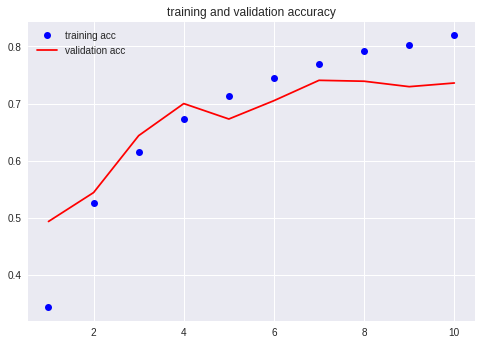

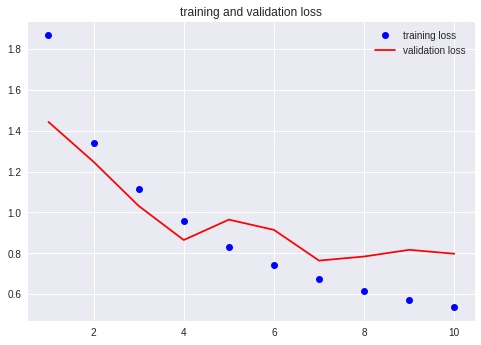

In [14]:

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, acc, 'bo', 
         label='training acc')
plt.plot(epochs, val_acc, 'r', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.title('training and validation loss')

plt.legend()

plt.show()

**Evaluate the model with validation set**

In [15]:

score = model.evaluate(val_images, val_labels, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1]*100,"%")

Validation loss: 0.7969928366661072
Validation accuracy: 73.59 %
